<a href="https://colab.research.google.com/github/hariomshahu/image-processing/blob/main/MeanFilter_RadioMaskFilter_GaussianFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* **why the normalization of values present in the filter should be normalized**
  * Normalizing the values present in the filter is crucial to prevent ***pixel saturation*** and maintain the integrity of the image when applying convolution operations like Gaussian filtering. Saturation occurs when pixel values exceed the dynamic range supported by the data type used to represent the image.
  * If the filter values are not normalized, particularly in cases where the sum of filter coefficients is greater than 1, the resulting pixel value after convolution can exceed the maximum intensity value supported by the image data type. This leads to pixel saturation, where pixel values are clipped to the maximum value, resulting in loss of information and undesirable artifacts.

*   **Mean Filter v/s Radio Mask Filter:**
Using a mean filter with a radiodisk involves applying the filter operation with a circular window, typically centered around each pixel, to calculate the average intensity within that circular neighborhood. This circular window provides a smoother result, especially for images with circular patterns or structures. On the other hand, a traditional mean filter uses a rectangular window, which can result in ***blocky artifacts***, especially around sharp edges or corners in the image.
*   **Radio Mask Filter v/s Gaussian Filter:**
  * Radiomask Mean Filter:
      * Suitable for images containing circular patterns or structures.
      * Provides smoothing while preserving the circular nature of objects or regions in the image.
      * Can be more computationally intensive compared to Gaussian filters, especially for large circular regions.
  * Gaussian Filter:
      * Offers a more general-purpose smoothing solution.
      * Effective for reducing noise and blurring sharp edges in images.
      * Provides smoother results overall compared to traditional mean filters, with the degree of smoothing controlled by the standard deviation parameter.
      * Generally computationally more efficient compared to radiomask mean filters.

* **Usage of RadioMask and Gaussian Filter:**
    * Radiomask Mean Filter:
      1. Medical Imaging: In MRI or CT scans, where circular structures like tumors or blood vessels need to be analyzed or segmented, a radiomask mean filter can help smooth the image while preserving the circularity of these structures.
      2. Astronomy: When processing astronomical images of celestial bodies such as stars or galaxies, radiomask mean filtering can be used to enhance features while maintaining the circular shape of these objects.
      3. Material Science: In microscopy images of materials with circular grains or particles, applying a radiomask mean filter can help in analyzing the distribution and characteristics of these grains accurately.
    * Gaussian Filter:
      1. Photography: Gaussian filtering is commonly used in photo editing software to reduce noise and smooth out imperfections while preserving overall image quality. For example, it can be applied to portrait photographs to soften skin tones while maintaining natural-looking features.
      2. Video Processing: In video compression algorithms, Gaussian filtering can be used as a pre-processing step to reduce spatial redundancy and enhance compression efficiency by smoothing out consecutive frames.
      3. Remote Sensing: In satellite imagery analysis, Gaussian filtering can help in reducing noise and atmospheric interference while preserving important features such as land cover types or geological formations.
* **Gaussian Filter Size:**
  * the kernal size should be approx k = 2 * pie * sigma, so that the kernal can capture the most of the energy of the gaussian
  * ***Smaller kernels (but still large enough to capture the extent of the smoothing) are preferable for real-time applications or when processing large images.***




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


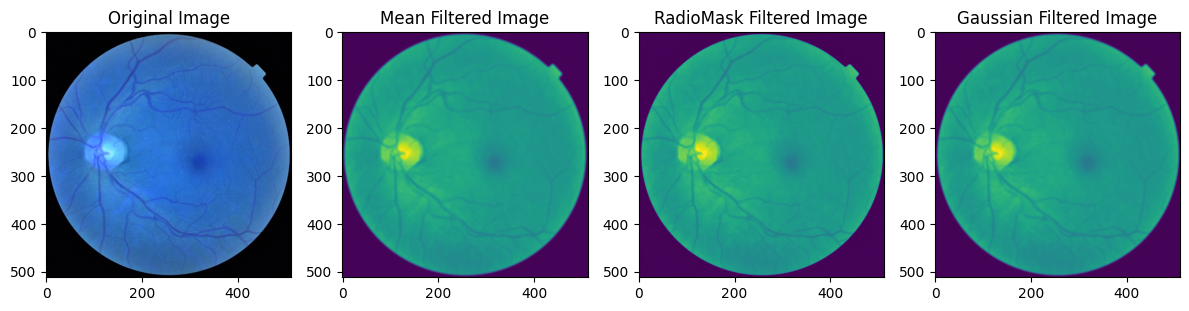

In [8]:
import cv2
import numpy as np

# Read the image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image_processing_sample_data/diabetic_retinopathy_1.jpeg")

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Mean Filter
mean_filtered_image = cv2.blur(gray_image, (5, 5))  # Kernel size: 5x5

# Define radiomask filter kernel
radiomask_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # Kernel size: 5x5

# Apply radiomask filter
radiomask_filtered_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, radiomask_kernel)

# Apply Gaussian Filter
gaussian_filtered_image = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=2)  # Kernel size: 5x5, Standard deviation: 1.5

# Display the results
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(12, 4))  # Create a 1x3 grid of subplots

axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(mean_filtered_image)
axs[1].set_title('Mean Filtered Image')

axs[2].imshow(radiomask_filtered_image)
axs[2].set_title('RadioMask Filtered Image')

axs[3].imshow(gaussian_filtered_image)
axs[3].set_title('Gaussian Filtered Image')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

